# **Project : Employee Attrition Analysis**

## **Loading Dataset**

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive,files
drive.mount('/content/drive')
def projectInitialization():
    print('Upload kaggle.json downloaded from kaggle')
    files.upload()
    !mkdir -p ~/.kaggle
    !cp kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json
    !pip install kaggle
    !kaggle datasets download -d whenamancodes/hr-employee-attrition
    data = !unzip hr-employee-attrition.zip
    return data

projectInitialization()

Mounted at /content/drive
Upload kaggle.json downloaded from kaggle


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/whenamancodes/hr-employee-attrition
License(s): CC0-1.0
  0% 0.00/50.1k [00:00<?, ?B/s]
100% 50.1k/50.1k [00:00<00:00, 41.4MB/s]


['Archive:  hr-employee-attrition.zip',
 '  inflating: HR Employee Attrition.csv  ']

## **Checking for Null values and Duplicate values**

In [2]:
data = pd.read_csv('HR Employee Attrition.csv')
def loadData():
  data_shape = data.shape
  checkNullValues = data.isnull().sum()
  checkDuplicateValues = data.duplicated().sum()
  result = {
      'data_shape':data_shape,
      'checkNullValues':checkNullValues,
      'checkDuplicateValues':checkDuplicateValues
  }
  return result
df = loadData()
df

{'data_shape': (1470, 35),
 'checkNullValues': Age                         0
 Attrition                   0
 BusinessTravel              0
 DailyRate                   0
 Department                  0
 DistanceFromHome            0
 Education                   0
 EducationField              0
 EmployeeCount               0
 EmployeeNumber              0
 EnvironmentSatisfaction     0
 Gender                      0
 HourlyRate                  0
 JobInvolvement              0
 JobLevel                    0
 JobRole                     0
 JobSatisfaction             0
 MaritalStatus               0
 MonthlyIncome               0
 MonthlyRate                 0
 NumCompaniesWorked          0
 Over18                      0
 OverTime                    0
 PercentSalaryHike           0
 PerformanceRating           0
 RelationshipSatisfaction    0
 StandardHours               0
 StockOptionLevel            0
 TotalWorkingYears           0
 TrainingTimesLastYear       0
 WorkLifeBalance        

## **Converting columns to Appropriate datatypes**

In [3]:
def standardizingTypes():
  df = data
  df[['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']] = df[['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']].astype('category')
  res = {
      'DataTypes':df.dtypes
  }
  return res
standardizingTypes()

{'DataTypes': Age                            int64
 Attrition                   category
 BusinessTravel              category
 DailyRate                      int64
 Department                  category
 DistanceFromHome               int64
 Education                      int64
 EducationField              category
 EmployeeCount                  int64
 EmployeeNumber                 int64
 EnvironmentSatisfaction        int64
 Gender                      category
 HourlyRate                     int64
 JobInvolvement                 int64
 JobLevel                       int64
 JobRole                     category
 JobSatisfaction                int64
 MaritalStatus               category
 MonthlyIncome                  int64
 MonthlyRate                    int64
 NumCompaniesWorked             int64
 Over18                        object
 OverTime                    category
 PercentSalaryHike              int64
 PerformanceRating              int64
 RelationshipSatisfaction       int64

## **Detecting Outliers**

In [4]:
def detectOutliers():
  col_with_outlier=[]
  df = data
  all_cols = ['DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']
  print('Detected Outliers')
  for col in all_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    if len(outliers)>0:
      print(f"\nNumber of Outliers Detected: {col} - {len(outliers)}")
      col_with_outlier.append(col)
    else:
      continue
print(detectOutliers())

Detected Outliers

Number of Outliers Detected: MonthlyIncome - 114

Number of Outliers Detected: NumCompaniesWorked - 52

Number of Outliers Detected: PerformanceRating - 226

Number of Outliers Detected: StockOptionLevel - 85

Number of Outliers Detected: TotalWorkingYears - 63

Number of Outliers Detected: TrainingTimesLastYear - 238

Number of Outliers Detected: YearsAtCompany - 104

Number of Outliers Detected: YearsInCurrentRole - 21

Number of Outliers Detected: YearsSinceLastPromotion - 107

Number of Outliers Detected: YearsWithCurrManager - 14
None


## **Calculate Attrition Rate**

In [5]:
def calculateAttritionRate():
  df = data
  Total_Employees_who_left = df['Attrition'].value_counts()[1]
  Total_Employees = df['Attrition'].count()
  print(f'Total Employees who left: {Total_Employees_who_left}')
  print(f'Total Employees: {Total_Employees}')
  Attrition_Rate = (Total_Employees_who_left / Total_Employees)*100
  print(f'Overall Attrition Rate: {Attrition_Rate:.2f}%')
  return Attrition_Rate
print(calculateAttritionRate())

Total Employees who left: 237
Total Employees: 1470
Overall Attrition Rate: 16.12%
16.122448979591837


<ipython-input-5-4c52e9cffd1b>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Total_Employees_who_left = df['Attrition'].value_counts()[1]


## **Data Visualization**

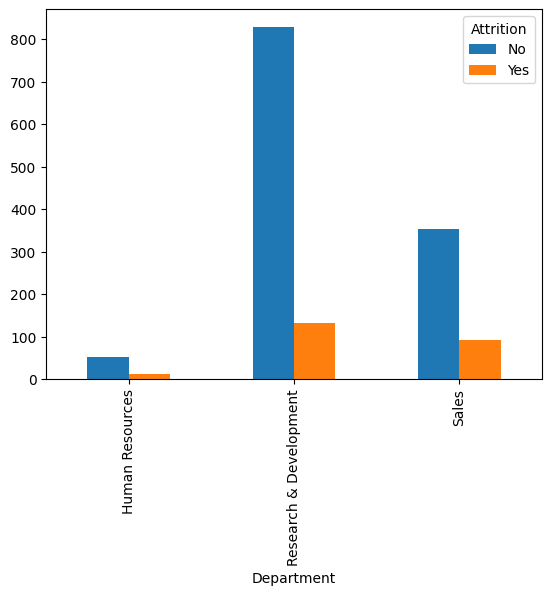

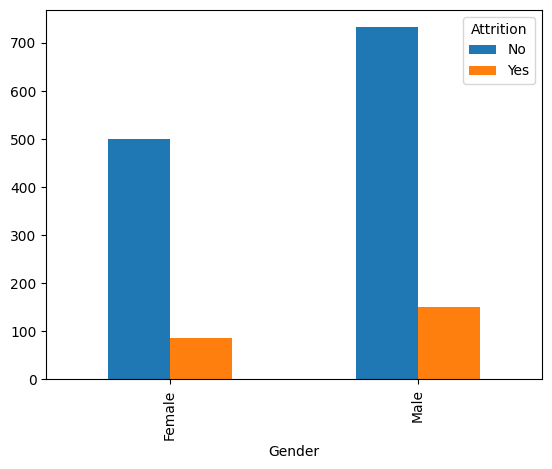

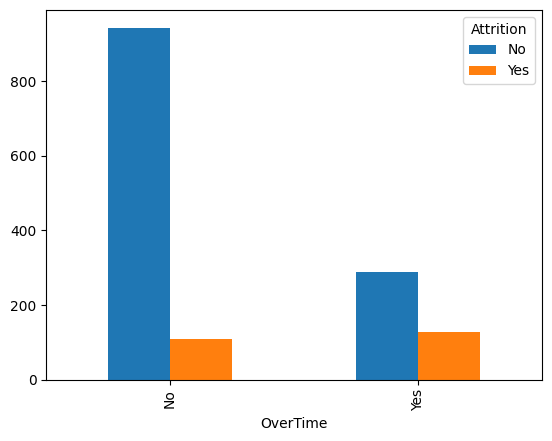

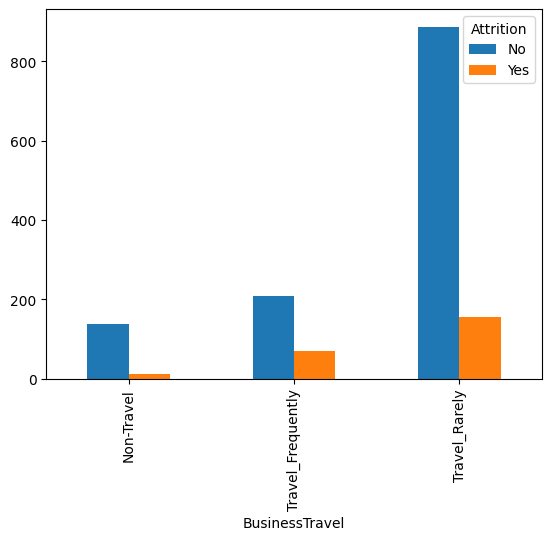

In [6]:
#Visualize Attrition vs department,Attrition vs Gender,Attrition vs OvertTime using crosstab plot
def crosstabVisualize():
  cols = ['Department','Gender','OverTime','BusinessTravel']
  for col in cols:
    crosstab = pd.crosstab(data[col],data['Attrition'])
    crosstab.plot.bar()
crosstabVisualize()

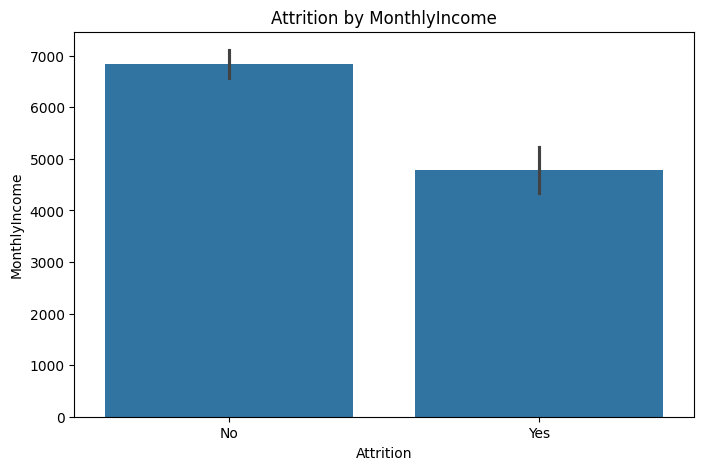

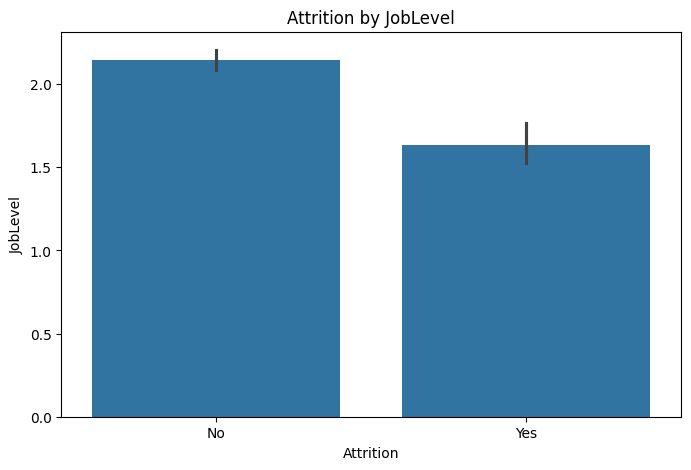

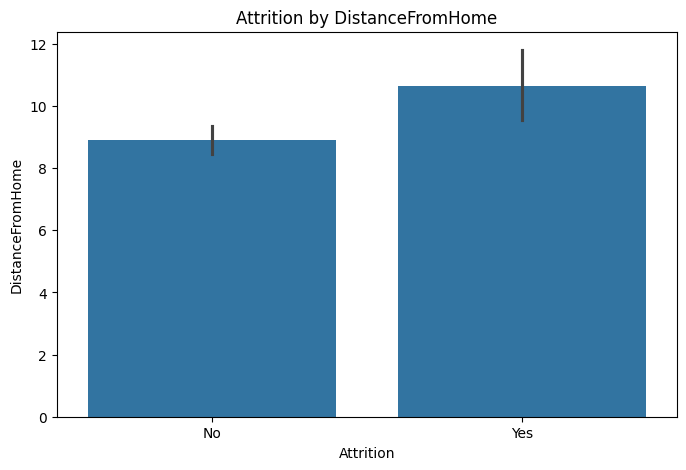

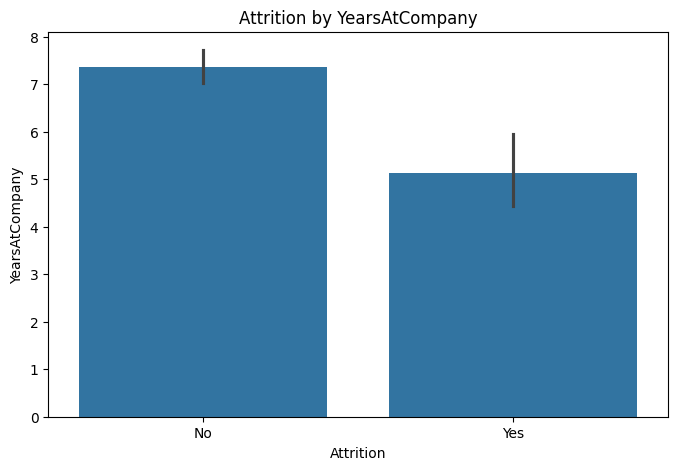

In [7]:
#Visaulize using barplot the following columns: MonthlyIncome,JobLevel,DistanceFromHome,YearsAtCompany
def barChartVisualize():
  cols = ['MonthlyIncome','JobLevel','DistanceFromHome','YearsAtCompany']
  df = data
  for col in cols:
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Attrition', y=col, data=df)
    plt.title(f'Attrition by {col}')
    plt.xlabel('Attrition')
    plt.ylabel(col)
    plt.show()
barChartVisualize()

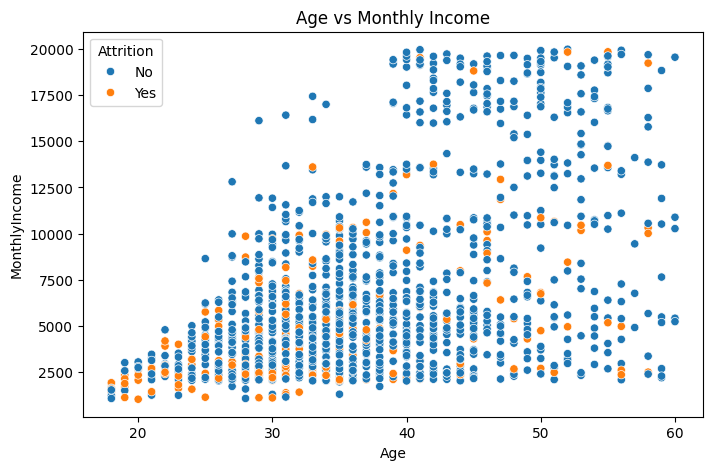

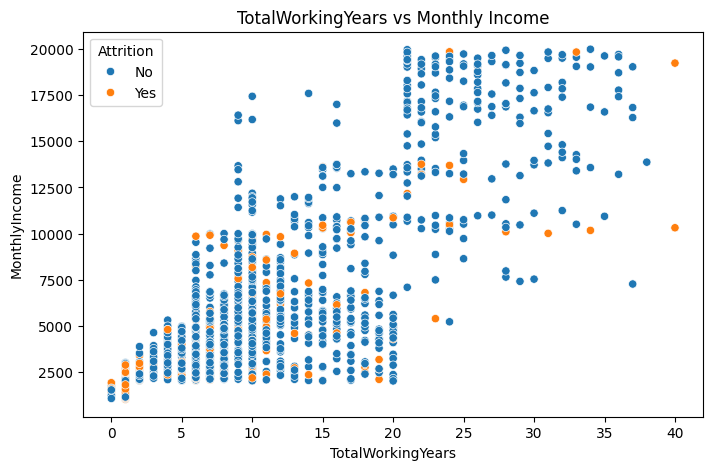

In [8]:
def scatterPlotVisualize():
  df = data
  cols = ['Age','TotalWorkingYears']
  for col in cols:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=col, y='MonthlyIncome', hue='Attrition', data=df)
    plt.title(f"{col} vs Monthly Income")
    plt.show()
scatterPlotVisualize()

## **Convert categorical column into numerical representation**

In [9]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import numpy as np
def convertCategoricalToNumericRepresentation():
  #Used Label Encoder
  cat_cols = ['Attrition','Gender','OverTime']
  label_encoder = preprocessing.LabelEncoder()
  df1 = data.copy()
  for col in cat_cols:
    df1[col] = label_encoder.fit_transform(df1[col])

  enc = OneHotEncoder(handle_unknown='ignore')
  #Used OneHot Encoder
  one_cat_cols = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
  for col in one_cat_cols:
    df_encoded = pd.get_dummies(df1[col],dtype=int)
    # output.append(df_encoded)
    df1 = pd.concat([df1, df_encoded], axis=1)
    df1.drop(col, axis=1, inplace=True)
  df1 = df1.drop(['EmployeeCount','Over18'],axis=1)
  output = {
      'df1':df1
  }
  return output
d = convertCategoricalToNumericRepresentation()
df2 = pd.DataFrame(d['df1'])

## **Correlation Matrix**

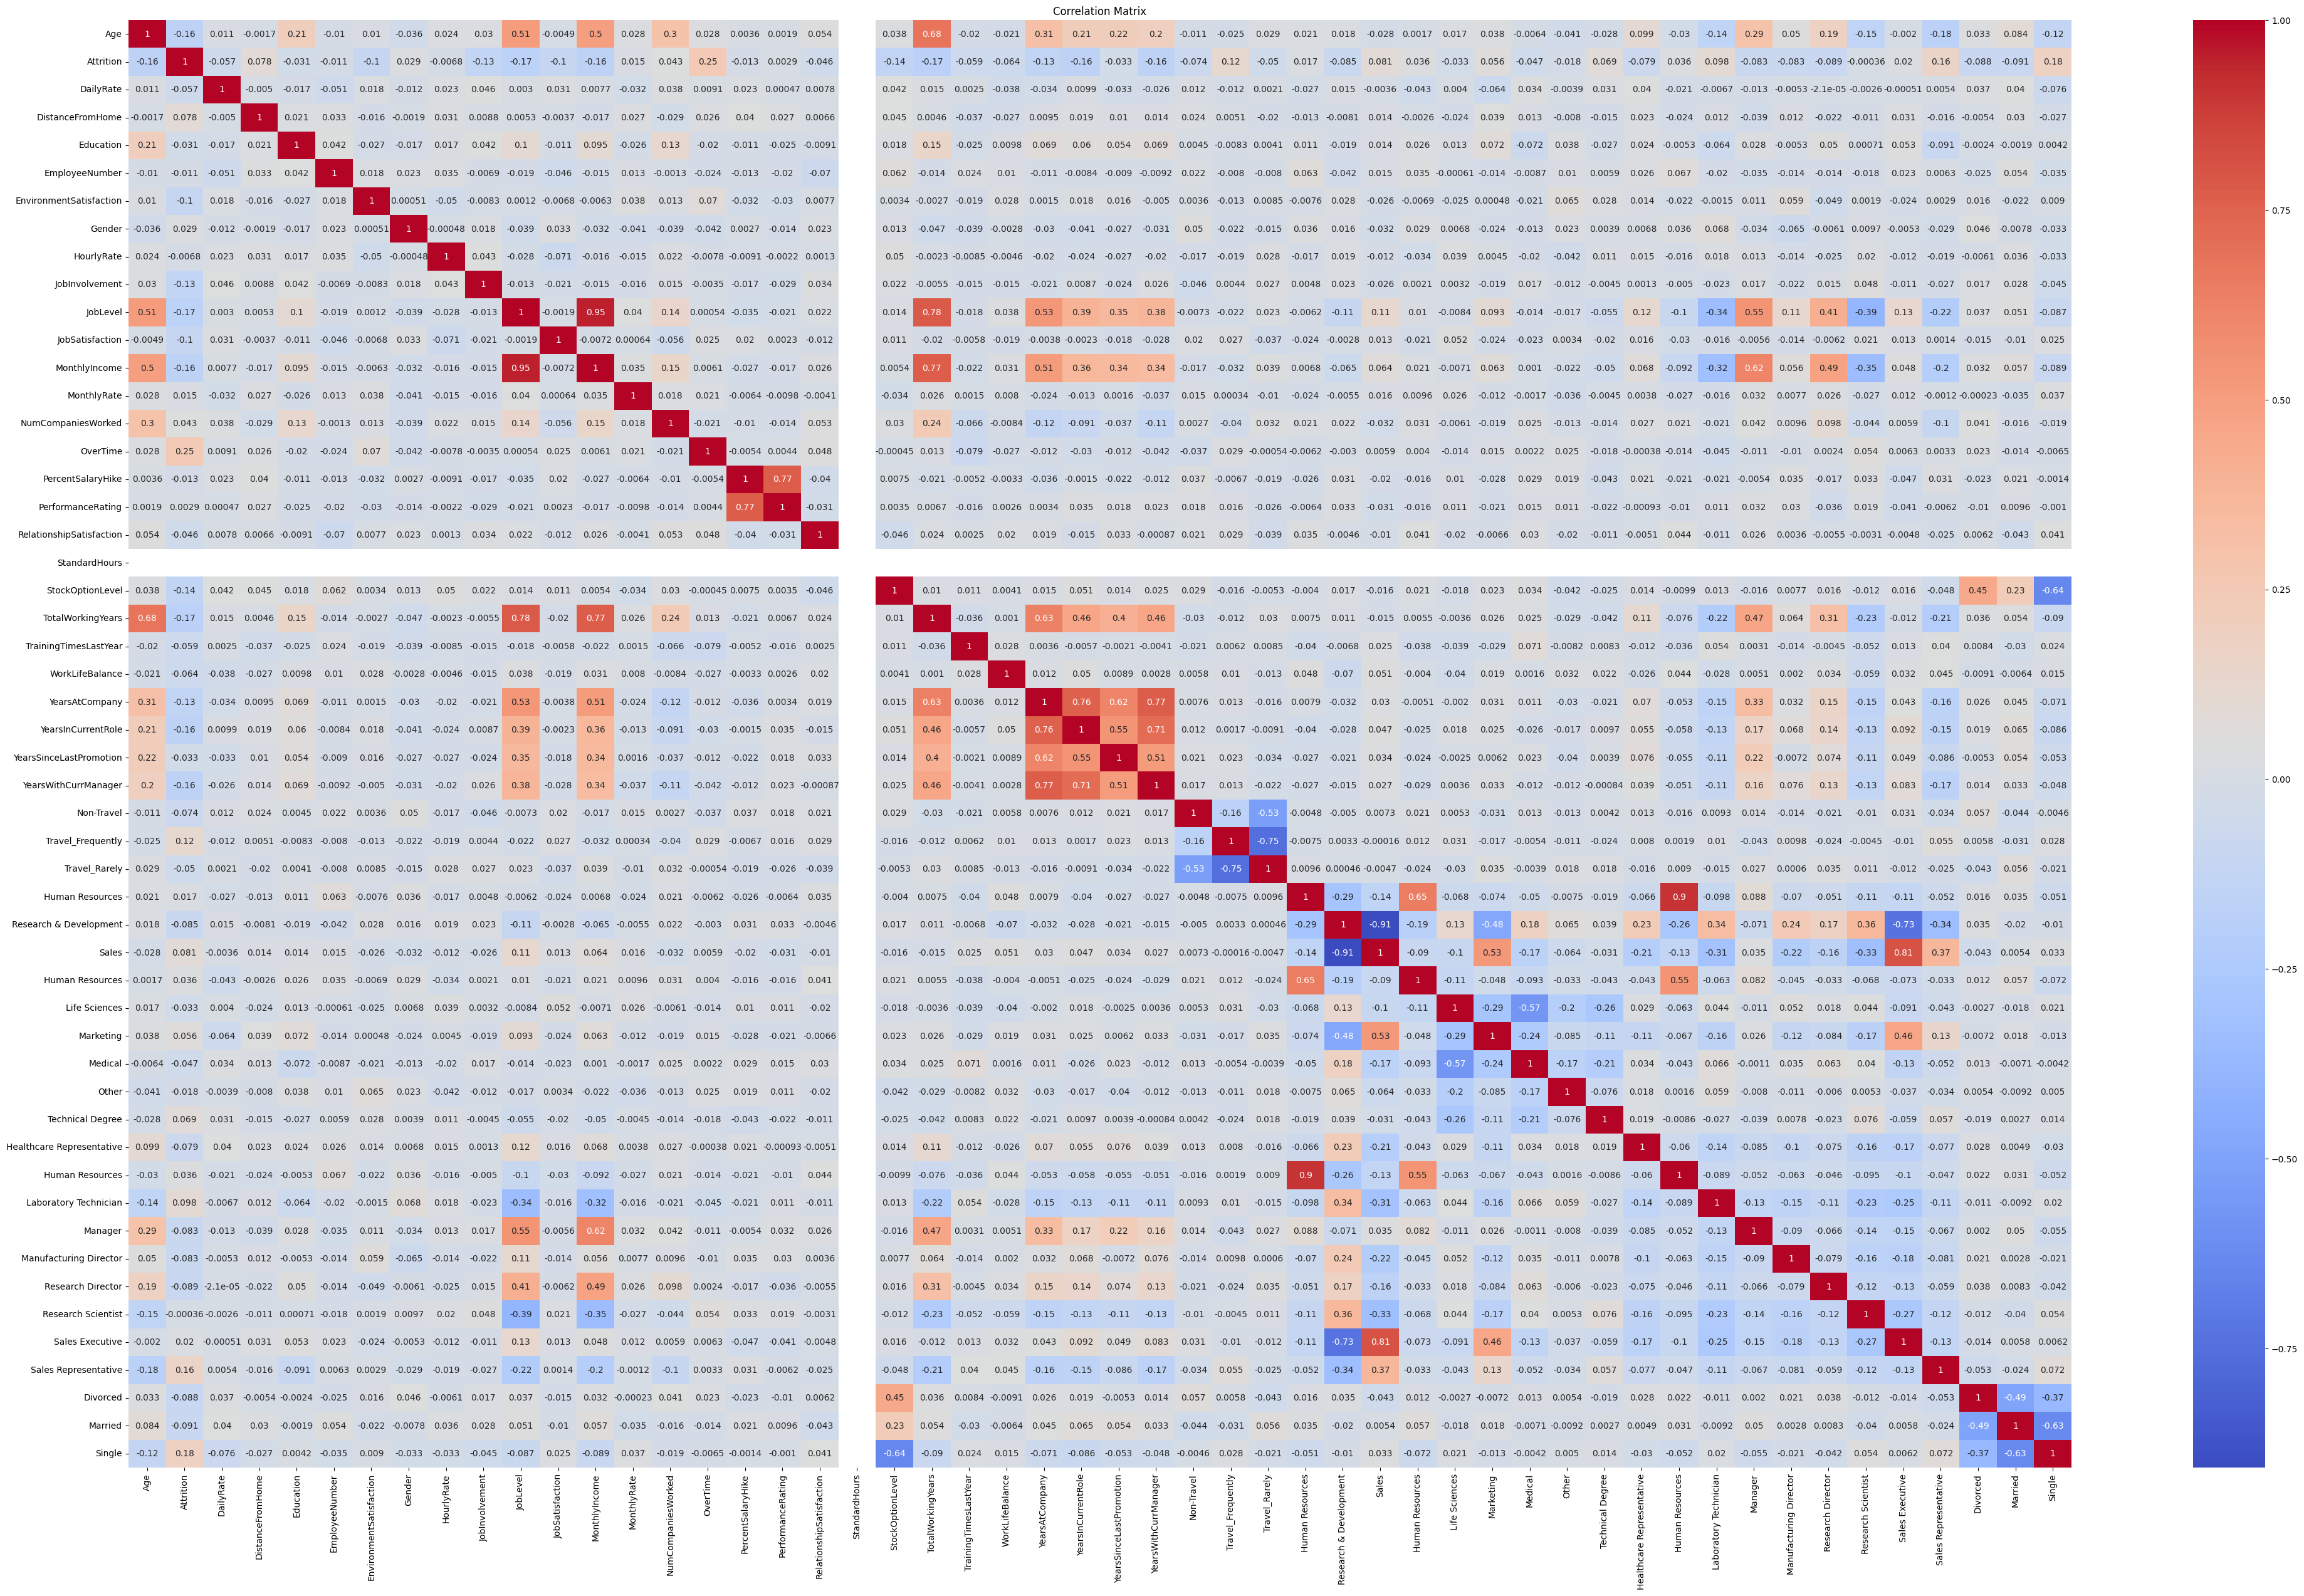

DailyRate                   -0.056652
DistanceFromHome             0.077924
Education                   -0.031373
EmployeeNumber              -0.010577
EnvironmentSatisfaction     -0.103369
Gender                       0.029453
HourlyRate                  -0.006846
JobInvolvement              -0.130016
JobLevel                    -0.169105
JobSatisfaction             -0.103481
MonthlyIncome               -0.159840
MonthlyRate                  0.015170
NumCompaniesWorked           0.043494
OverTime                     0.246118
PercentSalaryHike           -0.013478
PerformanceRating            0.002889
RelationshipSatisfaction    -0.045872
StandardHours                     NaN
StockOptionLevel            -0.137145
TotalWorkingYears           -0.171063
TrainingTimesLastYear       -0.059478
WorkLifeBalance             -0.063939
YearsAtCompany              -0.134392
YearsInCurrentRole          -0.160545
YearsSinceLastPromotion     -0.033019
YearsWithCurrManager        -0.156199
Non-Travel  

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [10]:
def correlationMatrix():
  plt.figure(figsize=(50, 30))
  sns.heatmap(df2.corr(numeric_only=True), annot=True, cmap='coolwarm')
  plt.title('Correlation Matrix')
  plt.show()
  return df2[df2.select_dtypes(include=['int64', 'float64']).columns[2:]].corrwith(df2['Attrition'])
print(correlationMatrix())

## **Hypothesis Testing**

In [11]:
#Hypothesis Testing
# OverTime does not significantly affect attrition.
# Monthly income does not impact attrition.
# Marital status does not influence attrition.
from scipy.stats import ttest_ind, chi2_contingency
numerical_cols = data.select_dtypes(include=['int64','float64']).columns
def hypothesis_testing(df,numerical_cols):
  result = []
  df = data
  for col in numerical_cols:
    left = df[df['Attrition'] == 'Yes'][col]
    stayed = df[df['Attrition']=='No'][col]
    # Peform independent t-test
    stat, p_value = ttest_ind(left, stayed)
      # print(f"\n{col} T-test Results: T-statistic = {stat:.2f}, P-value = {p_value:.4f}")
      # result.append({col:[stat,p_value]})
    if p_value < 0.05:
        result.append(f"{col} significantly affects attrition.")
    else:
        continue
  print('List of factors that affect attrition\n')
  for i in result:
    print(f'-> {i}')
hypothesis_testing(data,numerical_cols)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


List of factors that affect attrition

-> Age significantly affects attrition.
-> DailyRate significantly affects attrition.
-> DistanceFromHome significantly affects attrition.
-> EnvironmentSatisfaction significantly affects attrition.
-> JobInvolvement significantly affects attrition.
-> JobLevel significantly affects attrition.
-> JobSatisfaction significantly affects attrition.
-> MonthlyIncome significantly affects attrition.
-> StockOptionLevel significantly affects attrition.
-> TotalWorkingYears significantly affects attrition.
-> TrainingTimesLastYear significantly affects attrition.
-> WorkLifeBalance significantly affects attrition.
-> YearsAtCompany significantly affects attrition.
-> YearsInCurrentRole significantly affects attrition.
-> YearsWithCurrManager significantly affects attrition.


In [12]:
# Chi Square test for hypothesis testing
categorical_cols = data.select_dtypes(include=['category']).columns[1:]
df = data
def chi_square_test(df,categorical_cols):
  result = []
  for col in categorical_cols:
    contingency = pd.crosstab(df['Attrition'], df[col])
        # Perform Chi-Square Test
    chi2, p, dof, expected = chi2_contingency(contingency)
    if p < 0.05:
        # print("Conclusion: Product category preference differs by gender.")
        result.append(f"{col} significantly affects attrition.")
    else:
      continue
  print('List of factors that affect attrition\n')
  for i in result:
    print(f'-> {i}')
chi_square_test(df,categorical_cols)

List of factors that affect attrition

-> BusinessTravel significantly affects attrition.
-> Department significantly affects attrition.
-> EducationField significantly affects attrition.
-> JobRole significantly affects attrition.
-> MaritalStatus significantly affects attrition.
-> OverTime significantly affects attrition.


## **A/B Testing**

In [13]:
import scipy.stats as stats
def chiSquareABTesting():
  df = data
  contingency_table = pd.crosstab(df['OverTime'], df['Attrition'])

  # Perform Chi-Square test
  chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

  # Print results
  print(f"Chi-Square Statistic: {chi2:.4f}")
  print(f"P-Value: {p:.4f}")

  # Interpretation
  if p < 0.05:
      print("There is a significant difference in attrition between employees who work overtime and those who don't.")
  else:
      print("No significant difference in attrition between overtime and non-overtime employees.")
chiSquareABTesting()

Chi-Square Statistic: 87.5643
P-Value: 0.0000
There is a significant difference in attrition between employees who work overtime and those who don't.


In [14]:
def tTestABTesting():
  df = data
  left_salary = df[df['Attrition'] == 'Yes']['MonthlyIncome']
  stayed_salary = df[df['Attrition'] == 'No']['MonthlyIncome']

  # Perform T-Test
  t_stat, p_value = ttest_ind(left_salary, stayed_salary, equal_var=False)

  # Print results
  print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

  # Interpretation
  if p_value < 0.05:
      print("Employees who left had significantly different salaries compared to those who stayed.")
  else:
      print("No significant salary difference between employees who left and those who stayed.")
tTestABTesting()

T-Statistic: -7.4826, P-Value: 0.0000
Employees who left had significantly different salaries compared to those who stayed.
